## Protein Hunter Chai (Refiner)

In [ ]:
import os
import gc
import re
import torch
import py2Dmol
from chai_ph.pipeline import optimize_protein_design, sample_seq, is_smiles, clean_protein_sequence
from chai_ph.predict import ChaiFolder
from LigandMPNN.wrapper import LigandMPNNWrapper

In [9]:
from Bio.PDB import MMCIFParser, PDBParser
import numpy as np

# Amino acid 3-letter to 1-letter code conversion dict
RESTYPE_3TO1 = {
    "ALA": "A",
    "CYS": "C",
    "ASP": "D",
    "GLU": "E",
    "PHE": "F",
    "GLY": "G",
    "HIS": "H",
    "ILE": "I",
    "LYS": "K",
    "LEU": "L",
    "MET": "M",
    "ASN": "N",
    "PRO": "P",
    "GLN": "Q",
    "ARG": "R",
    "SER": "S",
    "THR": "T",
    "VAL": "V",
    "TRP": "W",
    "TYR": "Y",
    "MSE": "M",  # Selenomethionine maps to Methionine
}


def extract_sequence_from_structure(structure_file, chain_id="A"):
    """
    Extracts C-alpha coordinates and 1-letter amino acid sequence for a specific chain
    from a PDB or CIF file.
    """
    # Determine file type and use appropriate parser
    if structure_file.lower().endswith(".cif"):
        parser = MMCIFParser(QUIET=True)
    elif structure_file.lower().endswith(".pdb"):
        parser = PDBParser(QUIET=True)
    else:
        raise ValueError("File must be either .cif or .pdb format")

    structure = parser.get_structure("structure", structure_file)
    xyz = []
    sequence = []
    
    model = structure[0]

    if chain_id in model:
        chain = model[chain_id]
        for residue in chain:
            res_name = residue.resname.strip().upper()
            if "CA" in residue and res_name in RESTYPE_3TO1:
                xyz.append(residue["CA"].coord)
                sequence.append(RESTYPE_3TO1[res_name])
            elif res_name not in RESTYPE_3TO1:
                 # Handle non-canonical residues by skipping or using 'X' if appropriate
                 if "CA" in residue:
                    xyz.append(residue["CA"].coord)
                    sequence.append("X")

    if not xyz:
         raise ValueError(f"Chain {chain_id} not found or contains no C-alpha atoms in {structure_file}")
         
    return "".join(sequence)

In [10]:
gpu_id = 0
folder = ChaiFolder(device=f"cuda:{gpu_id}" if torch.cuda.is_available() else "cpu")
work_dir = os.getcwd()
designer = LigandMPNNWrapper(os.path.join(work_dir, "LigandMPNN/run.py"))

Binder: SLKEEALKNIDKAIELVKKNLPEEIAKPIIELLKKAKEALEKGDYEKALENLNKALSLLLDHKDLLSEETYREILNNILNAIANLSKLL
Target: AFTVTVPKDLYVVEYGSNMTIECKFPVEKELDLAALIVYWEMEDKNIIQFVHGEEDLKVQHSSYRQRARLLKDQLSLGNAALQITDVKLQDAGVYRCMISYGGADYKRITVKVNAPYAAALEHHHH


<IPython.core.display.Javascript object>

Initial seq: SLKEEALKNIDKAIELVKKNLPEEIAKPIIELLKKAKEALEKGDYEKALENLNKALSLLLDHKDLLSEETYREILNNILNAIANLSKLL


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

./results_chai_refiner/PDL1_refiner_chai/run_0 | Step 0: score=0.462 plddt=0.9 ptm=0.756 iptm=0.388 ipae=10.18 ala=9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

./results_chai_refiner/PDL1_refiner_chai/run_0 | Step 1: score=0.751 plddt=0.9 ptm=0.893 iptm=0.715 ipae=4.54 ala=15 rmsd=0.69


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

./results_chai_refiner/PDL1_refiner_chai/run_0 | Step 2: score=0.850 plddt=0.9 ptm=0.935 iptm=0.828 ipae=3.46 ala=10 rmsd=0.83
Saved high-confidence binder sequences to ./results_chai_refiner/PDL1_refiner_chai/high_iptm_yaml/run_0_cycle_2.yaml


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

./results_chai_refiner/PDL1_refiner_chai/run_0 | Step 3: score=0.876 plddt=0.9 ptm=0.943 iptm=0.859 ipae=3.25 ala=9 rmsd=0.77
Saved high-confidence binder sequences to ./results_chai_refiner/PDL1_refiner_chai/high_iptm_yaml/run_0_cycle_3.yaml


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

./results_chai_refiner/PDL1_refiner_chai/run_0 | Step 4: score=0.868 plddt=0.9 ptm=0.938 iptm=0.851 ipae=3.33 ala=8 rmsd=0.30
Saved high-confidence binder sequences to ./results_chai_refiner/PDL1_refiner_chai/high_iptm_yaml/run_0_cycle_4.yaml


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

./results_chai_refiner/PDL1_refiner_chai/run_0 | Step 5: score=0.856 plddt=0.9 ptm=0.935 iptm=0.836 ipae=3.49 ala=8 rmsd=0.42
Saved high-confidence binder sequences to ./results_chai_refiner/PDL1_refiner_chai/high_iptm_yaml/run_0_cycle_5.yaml


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

./results_chai_refiner/PDL1_refiner_chai/run_0 | Step 6: score=0.849 plddt=0.9 ptm=0.930 iptm=0.829 ipae=3.54 ala=8 rmsd=0.40
Saved high-confidence binder sequences to ./results_chai_refiner/PDL1_refiner_chai/high_iptm_yaml/run_0_cycle_6.yaml


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

./results_chai_refiner/PDL1_refiner_chai/run_0 | Step 7: score=0.601 plddt=0.9 ptm=0.831 iptm=0.544 ipae=6.41 ala=9 rmsd=0.62


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

./results_chai_refiner/PDL1_refiner_chai/run_0 | Step 8: score=0.867 plddt=0.9 ptm=0.938 iptm=0.849 ipae=3.36 ala=9 rmsd=0.73
Saved high-confidence binder sequences to ./results_chai_refiner/PDL1_refiner_chai/high_iptm_yaml/run_0_cycle_8.yaml


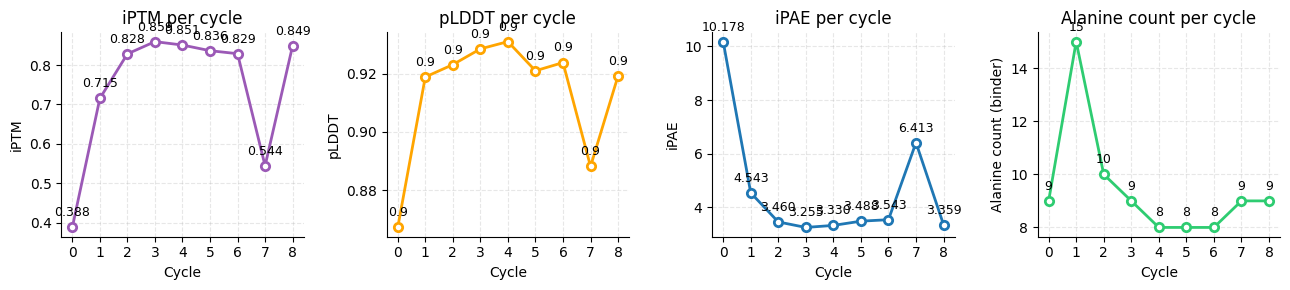

./results_chai_refiner/PDL1_refiner_chai/run_0 | Final Validation: score=0.822 plddt=0.9 ptm=0.913 iptm=0.799 ipae=4.41 ala=9 rmsd=0.60


In [12]:
# @title RUN
# @markdown input options
# @markdown -----
jobname = "PDL1_refiner_chai" # @param {"type":"string"}
initial_design_path = "/home/jupyter-yehlin/ProteinHunter/example/rank03_5c3tprot_1.cif" ## e.g. cif or pdb file
binder_chain = "A"  # @param {type:"string"}
binder_seq = extract_sequence_from_structure(initial_design_path, binder_chain)
binder_length = len(binder_seq)

# --- Target Protein(s) ---
target_chain = "B"  # @param {type:"string"}
target_seq = extract_sequence_from_structure(initial_design_path, target_chain)  # @param {type:"string"}
target_pdb = None # @param {"type":"string"}
target_pdb_chain = None # @param {"type":"string"}
cyclic = False # @param {"type":"boolean"}

print(f"Binder: {binder_seq}")
print(f"Target: {target_seq}")

# @markdown optimization options
# @markdown -----
n_trials = 1 # @param ["1","2","4","8","16"] {"type":"raw"}
n_cycles = 8 # @param ["0","1","2","3","5","10"] {"type":"raw"}
n_recycles = 3 # @param ["1","2","3"] {"type":"raw"}
n_diff_steps = 200 # @param ["50","100","200"] {"type":"raw"}
hysteresis_mode = "templates" # @param ["templates","esm","partial_diffusion", "none"]
repredict = True # @param {"type":"boolean"}

# @markdown mpnn options
# @markdown -----
omit_aa = "C" # @param {"type":"string"}
bias_aa = "" # @param {"type":"string"} A:-0.5
temperature = 0.1 # @param ["0.01","0.1","1.0"] {"type":"raw"}
scale_temp_by_plddt = False # @param {"type":"boolean"}
high_iptm_threshold = 0.8 # @param ["0.8","0.9","1.0"] {"type":"raw"}
# @markdown visual options
# @markdown -----
show_visual = True # @param {"type":"boolean"}
render_freq = 100 # @param ["1","10","100"] {"type":"raw"}
plot = True # @param {"type":"boolean"} 

###############
# Parsing opts
###############

jobname = re.sub(r'\W+', '', jobname)
def check(folder): return os.path.exists(folder)
if check(jobname):
  n = 0
  while check(f"{jobname}_{n}"): n += 1
  jobname = f"{jobname}_{n}"

binder_mode = "none"
if is_smiles(target_seq):
  binder_mode = "ligand"
else:
  target_seq = clean_protein_sequence(target_seq)
  if target_seq == "":
    target_seq = None
  else:
    binder_mode = "protein"

omit_AA = clean_protein_sequence(omit_aa)
bias_AA = bias_aa
if omit_AA == "": omit_AA = None
if bias_AA == "": bias_AA = None

if show_visual:
  viewer = py2Dmol.view((600,400), color="plddt")
  viewer.show()
else:
  viewer = None

#####################
# hysteresis_mode
#####################
opts = dict(use_esm=False,
            use_esm_target=binder_mode == "protein",
            pde_cutoff_intra=0.0,
            pde_cutoff_inter=0.0,
            partial_diffusion=0.0)
if hysteresis_mode == "templates":
  opts["pde_cutoff_intra"] = 1.5
  opts["pde_cutoff_inter"] = 3.0
elif hysteresis_mode == "esm":
  opts["use_esm"] = True
  opts["use_esm_target"] = True
elif hysteresis_mode == "partial_diffusion":
  opts["partial_diffusion"] = 0.5

# Initialize folder and designer only if they don't exist
# This allows re-running the cell without re-initializing if desired,
# but the cleanup at the end will handle memory if run multiple times.
if "folder" not in locals() or folder is None:
    folder = ChaiFolder(device="cuda:0" if torch.cuda.is_available() else "cpu")
if "designer" not in locals() or designer is None:
    designer = LigandMPNNWrapper()

X = []
for t in range(n_trials):
  if viewer is not None:
    viewer.new_obj()

  x = optimize_protein_design(
      folder,
      designer,
      initial_seq=binder_seq,
      binder_chain=binder_chain,
      target_seq=target_seq,
      target_chain=target_chain,
      target_pdb=target_pdb,
      target_pdb_chain=target_pdb_chain,
      prefix=f"./results_chai_refiner/{jobname}/run_{t}",
      n_steps=n_cycles,
      num_trunk_recycles=n_recycles,
      num_diffn_timesteps=n_diff_steps,
      num_diffn_samples=1,
      temperature=temperature,
      scale_temp_by_plddt=scale_temp_by_plddt,
      use_alignment=True,
      align_to="all",
      randomize_template_sequence=True,
      high_iptm_threshold=high_iptm_threshold,
      omit_AA=omit_AA,
      bias_AA=bias_AA,
      cyclic=cyclic,
      verbose=False,
      viewer=viewer,
      render_freq=render_freq,
      final_validation=repredict,
      plot=plot,
      **opts
  )
  X.append(x)

  folder.full_cleanup()
  # Explicitly clear memory between trials
  gc.collect()
  if torch.cuda.is_available():
      torch.cuda.empty_cache()

#########################
# restore best of best
#########################
best_sco = 0
best_n = None
# Check if X is not empty before proceeding
if X:
    for n,x in enumerate(X):
      # Ensure result and ranking_score exist
      if x and x.get("state") and x["state"].result and "ranking_score" in x["state"].result:
          if x["state"].result["ranking_score"] > best_sco:
            best_sco = x["state"].result["ranking_score"]
            best_n = n
      else:
            print(f"Warning: Skipping trial {n} for best selection due to missing data.")
      folder.restore_state(X[best_n]["state"])
else:
    print("Warning: No successful trials completed.")